In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.path)
from eigenwell.src import grid, eigen_k, eigen_w, structure, pec_pmc
from eigenwell.src.constants import *

from scipy.sparse.linalg import splu
import scipy.sparse.linalg as la

['/Users/nathanzhao/src/eigenwell/notebooks', '/Users/nathanzhao/src', '/Users/nathanzhao/opt/anaconda3/lib/python38.zip', '/Users/nathanzhao/opt/anaconda3/lib/python3.8', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/nathanzhao/src/ceviche', '/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/nathanzhao/.ipython']


(80, 80)
(6400, 6400)


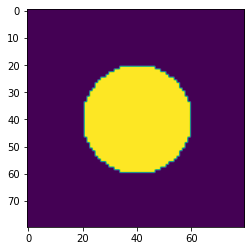

In [2]:
Nx = 80;
Ny = 80;
N = np.array([Nx, Ny]);

eps_r = np.ones(N);

a = np.array([1,1]);
dL = a/N;
radius = 0.25;
## put in a circle;
ci = int(Nx/2); cj= int(Ny/2);

cr = (radius/a[0])*Nx;
I,J=np.meshgrid(np.arange(eps_r.shape[0]),np.arange(eps_r.shape[1]));

print(eps_r.shape)
dist = np.sqrt((I-ci)**2 + (J-cj)**2);
#print(np.where(dist<cr))
eps_r[np.where(dist<cr)] = 6;

plt.imshow(eps_r)
wvlen_scan = np.linspace(1.01, 20, 100);
wvlen_scan = np.logspace(np.log10(0.8), np.log10(10), 600);


fd = grid.FiniteDifferenceGrid(dL,N)

print(fd.Dxf.shape)

st = structure.Structure(eps_r, a);

In [4]:
eigen2d = eigen_w.EigenOmega2D(st);
A = eigen2d.A;

wvlen = 1e-6;
omega = 2*np.pi*C0/(wvlen/1e-6);

eigvals, eigvecs = la.eigs(A, sigma = omega**2, k = 10)

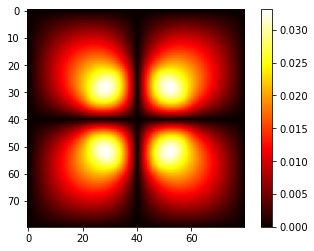

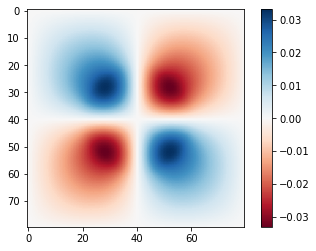

In [6]:
plt.imshow(np.abs(eigvecs[:,0].reshape(N)), cmap = 'hot')
plt.colorbar();
plt.show();
plt.imshow(np.real(eigvecs[:,0].reshape(N)), cmap = 'RdBu')
plt.colorbar();

## Photonic Band Structure
#### Ky = 0

(6400, 6400)


/Users/nathanzhao/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


650868


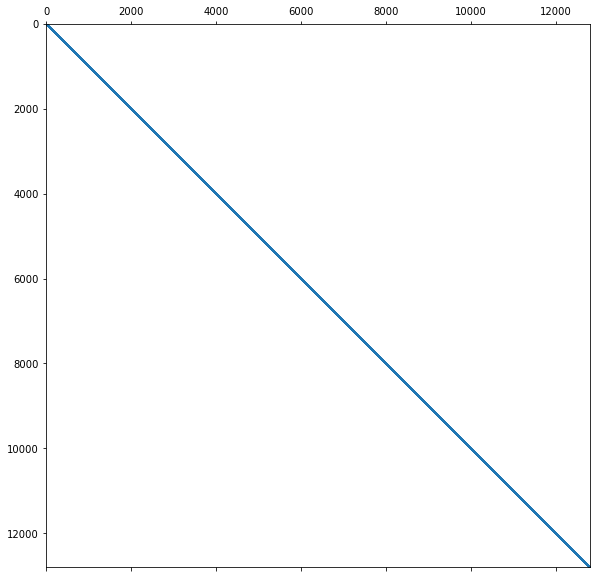

In [7]:
from scipy.sparse.linalg import splu

eigk = eigen_k.EigenK2D(st)
print(fd.Dxf.shape)
OA = eigk.OA;
OB = eigk.OB;
plt.figure(figsize = (10,10));
plt.spy(OB, markersize = 0.5);

B = splu(OA-OB)
print(B.L.count_nonzero())



In [8]:
wvlen = 1e-6;
omega = 2*np.pi*C0/(wvlen/1e-6);
eigvals, eigvecs = la.eigs(OA, k = 10, M = OB, sigma = 0)


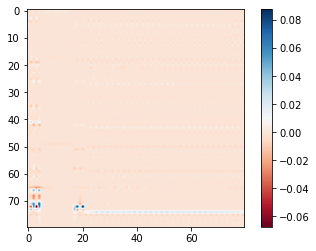

In [9]:
plt.imshow(np.real(np.reshape(eigvecs[0:np.prod(N),2], N)), cmap = 'RdBu')
plt.colorbar();

In [ ]:
#wvlen_scan = np.linspace(1,10,60);
wvlen_scan = np.logspace(np.log10(1), np.log10(5),550)
spectra = [];
for c,wvlen in enumerate(wvlen_scan):
    omega = 2*np.pi*C0/(wvlen);
    eigvals, eigvecs = eigk.eigensolve(omega, Ky, num_modes = 10)
    spectra.append(eigvals);
    if(c%5 == 0):
        print(c, wvlen)
spectra = np.array(spectra)

In [ ]:
plt.figure(figsize = (5,5));
plt.plot(np.real(spectra), 1/wvlen_scan, '.b', markersize = 2);
plt.plot(np.imag(spectra),  1/wvlen_scan, '.r', markersize = 2);
#plt.xlim((-30e6, 50e6))
plt.show();
